## Bar Charts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail = pd.read_csv('online_retail2.csv')
retail = retail.drop_duplicates()
retail = retail.dropna(axis = 0,how ='any')
retail.Quantity = retail.Quantity.apply(abs)
retail['InvoiceDate']= pd.to_datetime(retail['InvoiceDate'])
retail.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [ ]:
retail.Country.value_counts()

In [ ]:
selected_countries = retail.Country.value_counts()[1:12]
selected_countries = selected_countries.index
selected_countries

In [ ]:
retail_new = retail[retail.Country.isin(selected_countries)]
retail_new.sample(10)

In [ ]:
group_country = retail_new.groupby(['Country']).agg(
                                                num_country   = ('Country' ,'count')
                                                    ).reset_index()

group_country

In [ ]:
sns.barplot(x = 'Country',y = 'num_country',data = group_country);

In [ ]:
sns.barplot(x = 'num_country',y = 'Country',data = group_country);

In [ ]:
sns.countplot(x = 'Country',data = retail_new);

In [ ]:
sns.countplot(y = 'Country',data = retail_new);

## Sorting Columns

In [ ]:
# 1st way to sort chart
group_country_sorted = group_country.sort_values(
                                by='num_country',ascending=False).reset_index(drop=True)
group_country_sorted

In [ ]:
sns.barplot(x='num_country',y='Country',data=group_country_sorted);

In [ ]:
#2nd way 
ordered_set = group_country.sort_values(by='num_country',ascending=False).Country

sns.barplot(x = 'num_country',
            y = 'Country',
            data = group_country,
            order = ordered_set
           );

In [ ]:
sns.countplot(y='Country',
              data = retail_new,
              order = ordered_set
             );

## Modifying Charts

In [ ]:
sns.countplot(y='Country',
              data = retail_new,
              order = ordered_set
             )

# Remove labels and ticks
plt.xticks(ticks=[])
plt.ylabel(None)
plt.xlabel(None)

#Remove borders
ax = plt.gca() # Get Current Axies
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

In [ ]:
#Remove Baghalies
sns.set_style()

sns.countplot(y='Country',
              data = retail_new,
              order = ordered_set
             )

# Remove labels and ticks
plt.xticks(ticks=[])
plt.ylabel(None)
plt.xlabel(None)

#Remove borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


In [ ]:
sns.countplot(y='Country',
              data = retail_new,
              order = ordered_set
             )
# Remove labels and ticks
plt.xticks(ticks=[])
plt.ylabel(None)
plt.xlabel(None)
#Remove borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

for i in range(len(group_country.Country)):
    plt.text(
        x = group_country_sorted.loc[i,'num_country'] + 200,
        y = i,
        s = group_country_sorted.num_country[i],
        verticalalignment = 'center'
            )

In [ ]:
sns.countplot(y='Country',
              data = retail_new,
              order = ordered_set
             )
for i in range(len(group_country.Country)):
    plt.text(
        x = group_country_sorted.loc[i,'num_country'] + 200,
        y = i,
        s = group_country_sorted.num_country[i],
        verticalalignment = 'center'
            )

sns.despine(bottom=True)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(ticks=[])
plt.show()

## Multiple Series Bar Charts

In [3]:
sample_countries = retail[retail.Country.isin(
    ['France', 'Germany', 'EIRE','Netherlands'])
                         ].reset_index(drop=True).copy()
sample_countries.sample(6)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
41806,566115,21680,WOODLAND STICKERS,12,2011-09-09 10:51:00,0.85,12674.0,France
2370,495232,22286,"DECORATION , WOBBLY RABBIT , METAL",12,2010-01-22 09:19:00,1.65,14156.0,EIRE
44497,569893,21930,JUMBO STORAGE BAG SKULLS,10,2011-10-06 15:51:00,2.08,12627.0,Germany
22023,531568,21914,BLUE HARMONICA IN BOX,12,2010-11-09 10:31:00,1.25,12681.0,France
32992,552946,21156,RETROSPOT CHILDRENS APRON,8,2011-05-12 11:50:00,1.95,12683.0,France
30554,C547581,22554,PLASTERS IN TIN WOODLAND ANIMALS,1,2011-03-24 10:58:00,1.65,12474.0,Germany


In [5]:
sample_countries['week_day'] = sample_countries.InvoiceDate.dt.day_name()
sample_countries.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,week_day
0,489439,22065,CHRISTMAS PUDDING TRINKET POT,12,2009-12-01 09:28:00,1.45,12682.0,France,Tuesday
1,489439,22138,BAKING SET 9 PIECE RETROSPOT,9,2009-12-01 09:28:00,4.95,12682.0,France,Tuesday
2,489439,22139,RETRO SPOT TEA SET CERAMIC 11 PC,9,2009-12-01 09:28:00,4.95,12682.0,France,Tuesday


In [6]:
sample_countries['week_day'].value_counts()

Thursday     11021
Tuesday       9659
Friday        9542
Monday        9091
Wednesday     8755
Sunday        4319
Name: week_day, dtype: int64

In [10]:
gp_sample_countries = sample_countries.groupby(['week_day','Country']).agg(
                        total_quant = ('Quantity','sum')
                        ).reset_index()
gp_sample_countries

total_quant
week_day  Country                 
Friday    EIRE               48327
          France             35992
          Germany            46569
          Netherlands        74475
Monday    EIRE               53631
          France            113028
          Germany            42807
          Netherlands        41260
Sunday    EIRE               31914
          France             15325
          Germany            21873
          Netherlands         9239
Thursday  EIRE               77646
          France             44012
          Germany            48945
          Netherlands       102853
Tuesday   EIRE               55822
          France            116513
          Germany            33450
          Netherlands        88025
Wednesday EIRE               59485
          France             35749
          Germany            34886
          Netherlands        71333

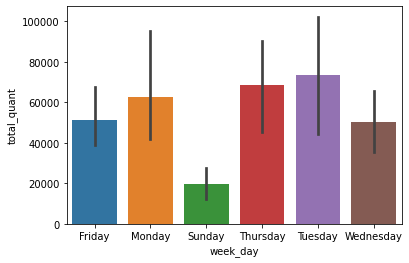

In [8]:
sns.barplot(x = 'week_day',y = 'total_quant' , data = gp_sample_countries);

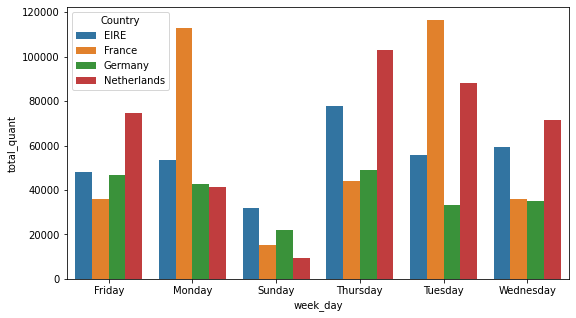

In [9]:
plt.figure(figsize=(9,5))
sns.barplot(x = 'week_day',
            y = 'total_quant' , 
            data = gp_sample_countries,
            hue = 'Country');

In [11]:
piv = gp_sample_countries.pivot_table(values = 'total_quant',
                                     index = 'week_day',
                                     columns = 'Country'
                                     )
piv

Country,EIRE,France,Germany,Netherlands
week_day,,,,
Friday,48327,35992,46569,74475
Monday,53631,113028,42807,41260
Sunday,31914,15325,21873,9239
Thursday,77646,44012,48945,102853
Tuesday,55822,116513,33450,88025
Wednesday,59485,35749,34886,71333


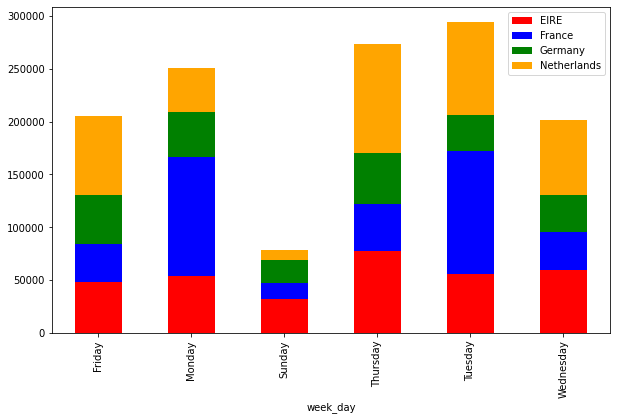

In [12]:
piv.plot(kind='bar', stacked=True , color=['red', 'blue', 'green','orange'],figsize=(10,6));
plt.legend()

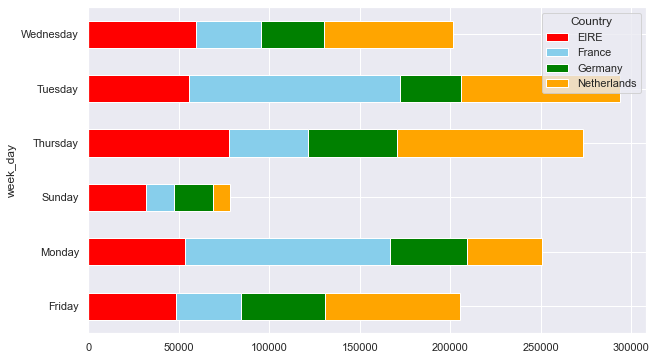

In [15]:
piv.plot(kind='barh', stacked=True,color=['red', 'skyblue', 'green','orange'],figsize=(10,6)) ;
sns.set()